###  Provide Insights to Revenue Team in Hospitality Domain

Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, Atliq Grands are losing its market share and revenue in the luxury/business hotels category. As a strategic move, the managing director of Atliq Grands wanted to incorporate “Business and Data Intelligence” in order to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights.

Their revenue management team had decided to hire a 3rd party service provider to provide them insights from their historical data.

#### Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the given datasets

In [2]:
df_date = pd.read_csv(r"C:\Users\Shubham\Music\Codebasics\Atliq Hospitality Revenue\dim_date.csv")
df_hotel = pd.read_csv(r"C:\Users\Shubham\Music\Codebasics\Atliq Hospitality Revenue\dim_hotels.csv")
df_room = pd.read_csv(r"C:\Users\Shubham\Music\Codebasics\Atliq Hospitality Revenue\dim_rooms.csv")
df_agg = pd.read_csv(r"C:\Users\Shubham\Music\Codebasics\Atliq Hospitality Revenue\fact_aggregated_bookings.csv")
df_fact = pd.read_csv(r"C:\Users\Shubham\Music\Codebasics\Atliq Hospitality Revenue\fact_bookings.csv")

##### About Given Datasets
1. df_date contains informations related to date,month,week number and type of day of checkin in hotels
2. df_hotels contains informations about hotels like property id, property name, category and location of property
3. df_room contains informations about what types of room available
4. df_agg contains informations about number of successful booking at perticular property with check in date and capacity of room type
5. df_fact contains informations about revenue generated  

In [3]:
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [4]:
df_hotel.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [5]:
df_room.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [6]:
df_agg.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30


In [7]:
df_fact.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640


In [8]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [9]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [10]:
df_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [11]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [12]:
df_fact.shape

(134590, 12)

In [13]:
df_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


##### After finding information about all 5 datasets on only fifth datasets contain some missing value in column Rating_given 

### Merging Two dataframe Hotel and aggregate

In [14]:
df_hotel_agg = pd.merge(df_hotel,df_agg, on= 'property_id', how= 'inner')
df_hotel_agg.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity
0,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT1,18,19
1,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT2,21,22
2,16558,Atliq Grands,Luxury,Delhi,01-May-22,RT3,8,8


In [15]:
df_hotel_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9200 entries, 0 to 9199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   property_name        9200 non-null   object
 2   category             9200 non-null   object
 3   city                 9200 non-null   object
 4   check_in_date        9200 non-null   object
 5   room_category        9200 non-null   object
 6   successful_bookings  9200 non-null   int64 
 7   capacity             9200 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 646.9+ KB


### Merging Hotels and fact Aggregate bookings together

In [16]:
df_hotel_fact = pd.merge(df_hotel,df_fact, on= 'property_id', how= 'inner')

In [17]:
df_hotel_fact.shape

(134590, 15)

In [18]:
df_hotel_fact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   property_id        134590 non-null  int64  
 1   property_name      134590 non-null  object 
 2   category           134590 non-null  object 
 3   city               134590 non-null  object 
 4   booking_id         134590 non-null  object 
 5   booking_date       134590 non-null  object 
 6   check_in_date      134590 non-null  object 
 7   checkout_date      134590 non-null  object 
 8   no_guests          134590 non-null  int64  
 9   room_category      134590 non-null  object 
 10  booking_platform   134590 non-null  object 
 11  ratings_given      56683 non-null   float64
 12  booking_status     134590 non-null  object 
 13  revenue_generated  134590 non-null  int64  
 14  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 1

### Parsing date object into Datetime formate

In [19]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [20]:
df_date['date'] = df_date['date'].apply(lambda x: datetime.strptime(x,'%d-%b-%y'))
df_date.head(2)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday


In [21]:
df_hotel_fact['check_in_date'] = df_hotel_fact['check_in_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

##### Here date column is object type so we need to convert into date format so i applied lambda function on date column

#### Renaming Column name and considering those columns which required.

In [22]:
df_date2 = df_date.loc[:,['date','day_type']].rename(columns = {'date': 'check_in_date'})
df_date2.head(3)

,check_in_date,day_type
0,2022-05-01,weekend
1,2022-05-02,weekeday
2,2022-05-03,weekeday


In [23]:
df_hotel_fact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   property_id        134590 non-null  int64         
 1   property_name      134590 non-null  object        
 2   category           134590 non-null  object        
 3   city               134590 non-null  object        
 4   booking_id         134590 non-null  object        
 5   booking_date       134590 non-null  object        
 6   check_in_date      134590 non-null  datetime64[ns]
 7   checkout_date      134590 non-null  object        
 8   no_guests          134590 non-null  int64         
 9   room_category      134590 non-null  object        
 10  booking_platform   134590 non-null  object        
 11  ratings_given      56683 non-null   float64       
 12  booking_status     134590 non-null  object        
 13  revenue_generated  134590 non-null  int64   

### Merging Hotels, Fact Aggregrate booking and date to track weekends trends

In [24]:
df_final = pd.merge(df_hotel_fact,df_date2, on= 'check_in_date', how='inner')
df_final.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_type
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,weekend
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,weekend
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,weekend


In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 134589
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   property_id        134590 non-null  int64         
 1   property_name      134590 non-null  object        
 2   category           134590 non-null  object        
 3   city               134590 non-null  object        
 4   booking_id         134590 non-null  object        
 5   booking_date       134590 non-null  object        
 6   check_in_date      134590 non-null  datetime64[ns]
 7   checkout_date      134590 non-null  object        
 8   no_guests          134590 non-null  int64         
 9   room_category      134590 non-null  object        
 10  booking_platform   134590 non-null  object        
 11  ratings_given      56683 non-null   float64       
 12  booking_status     134590 non-null  object        
 13  revenue_generated  134590 non-null  int64   

### Lets Map the Room Category of final DataFrame with the Room Class of room dataframe
As from DataFrame df_room 
1. RT1 is Standard
2. RT2 is Elite
3. RT3 is Premium 
4. RT4 is Presidentials

In [26]:
df_final['room_category'] = df_final['room_category'].map({'RT1': 'Standard','RT2': 'Elite','RT3': 'Premium','RT4': 'Presidential'})

In [27]:
df_final.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,day_type
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT11,2022-04-27,2022-05-01,2022-05-02,3,Standard,direct online,1.0,Checked Out,10010,10010,weekend
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,Standard,others,NaN,Cancelled,9100,3640,weekend
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT13,2022-04-28,2022-05-01,2022-05-04,2,Standard,logtrip,5.0,Checked Out,9100,9100,weekend


### Now lets compute some usefull informations

##### 1. Total sum of Revenue_Realized

In [28]:
df_final['revenue_realized'].sum()

1708771229

##### 2. Total Counts of Booking Id

In [29]:
df_final['booking_id'].nunique()

134590

##### 3. Average of Ratings given by Customers

In [30]:
df_final['ratings_given'].mean()

3.619003934160154

##### 4. Total Sum of Capacity

In [31]:
total_capacity = df_agg['capacity'].sum()
total_capacity

232576

##### 5. Sum of successful_bookings from fact_bookings

In [32]:
Total_successful_bking = df_agg['successful_bookings'].sum()
Total_successful_bking

134590

##### 6. Ratio of Total Successful bookings to Total Capacity

In [33]:
Occupancy_ratio = Total_successful_bking / total_capacity
Occupancy_Rate = Occupancy_ratio*100
Occupancy_Rate

57.86925564116676

#####  7. Count of booking_id in which booking_status = "Cancelled"

In [34]:
df_final.groupby('booking_status')['booking_id'].count()

booking_status
Cancelled      33420
Checked Out    94411
No Show         6759
Name: booking_id, dtype: int64

In [35]:
no_cancelled = df_final[df_final['booking_status'] == 'Cancelled'].booking_status.value_counts()
print(no_cancelled)

Cancelled    33420
Name: booking_status, dtype: int64


##### 8. Ratio of 'Total Cancelled Bookings' to 'Total Bookings'

In [36]:
cancelleation_rate = no_cancelled/ Total_successful_bking *100
cancelleation_rate

Cancelled    24.830968
Name: booking_status, dtype: float64

#### 9. Total Revenue Generated

In [37]:
df_final['revenue_generated'].sum()

2007546215

### Conclussion or Observations
1. Total Sum of Revenue Realized =  _____________1708771229 apprx =___ 1.71bn
2. Total Counts of Booking Id =     _____________________134590
3. Average of Ratings given by Customers = _______________________3.62
4. Total Sum of Capacity = __________________________________232576
5. Total Sum of successful bookings = __________________134590
6. Occupancy Rate = __________________________________ 57.87 %
7. Count of booking_id in which booking_status = "Cancelled" =_______33420
8. Cancellation Rate = ______________________________________24.83 %
9. Total Revenue Generated =________2007546215 approx = ________2bn
10. Total revenue loss = Revenue Generated - Revenue Realized =__ 298774986 approx = ______ 0.3bn
11. Total room left unfilled = capacity - successfull booking = ______ 97,986

## Maximum Revenue Realized.
1. Revenue realized according to city, category, room category and property name
2. Rating given according to room category and property type


In [45]:
price_RT1 = df_final[df_final['room_category'] == 'Standard']['revenue_generated'].mean()
price_RT2 = df_final[df_final['room_category'] == 'Elite']['revenue_generated'].mean()
price_RT3 = df_final[df_final['room_category'] == 'Premium']['revenue_generated'].mean()
price_RT4 = df_final[df_final['room_category'] == 'Presidential']['revenue_generated'].mean()

In [46]:
data = {'Room_category' : ['Standard','Elite','Premium','Presidential'],
       'Avg_Price': [price_RT1,price_RT2,price_RT3,price_RT4]}
Avg_price_room = pd.DataFrame(data)
Avg_price_room

,Room_category,Avg_Price
0,Standard,9455.995292
1,Elite,13310.699121
2,Premium,17784.395734
3,Presidential,27465.751260


##### Total sum of Revenue_Realized from each room_category

<AxesSubplot:xlabel='room_category'>

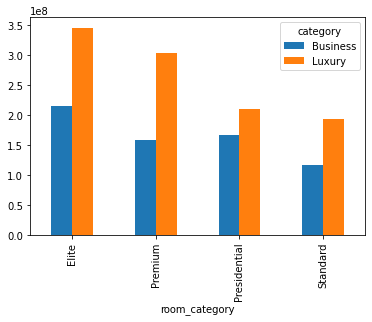

In [39]:
df_final.groupby(['room_category','category'])['revenue_realized'].sum().unstack().plot.bar()

In [40]:
### Observations 
1. Luxuary hotels of Elite room category Generate maximum Revenue follwed by Premium
2. Standard room category Generate less among all type of room category
3. Elite is second class 

SyntaxError: invalid syntax (3370063403.py, line 2)

In [ ]:
city_rev_val = df_final.city.value_counts().values

In [ ]:
city_rev_index = df_final.city.value_counts().index

In [ ]:
plt.pie(city_rev_val, labels=city_rev_index, autopct= '%1.2f%%')

In [ ]:
category_rev_val = df_final.category.value_counts().values
category_rev_index = df_final.category.value_counts().index
plt.pie(category_rev_val, labels=category_rev_index, autopct= '%1.2f%%')

In [ ]:
property_rev_val = df_final.property_name.value_counts().values
property_rev_index = df_final.property_name.value_counts().index
plt.pie(property_rev_val, labels=property_rev_index, autopct= '%1.2f%%')

In [ ]:
room_category_rev_val = df_final.room_category.value_counts().values
room_category_rev_index = df_final.room_category.value_counts().index
plt.pie(room_category_rev_val, labels=room_category_rev_index, autopct= '%1.2f%%')

In [ ]:
df_final['ratings_given'].value_counts()

In [ ]:
df_final.groupby('city')['ratings_given'].mean()

In [ ]:
df_final.groupby('room_category')['ratings_given'].mean()

In [ ]:
df_final.groupby('category')['ratings_given'].mean()

In [ ]:
df_final.groupby(['room_category','city'])['ratings_given'].mean().unstack().plot.bar()

In [ ]:
df_final.groupby(['category','room_category','city'])['ratings_given'].mean().unstack().plot.bar()

In [ ]:
df_final.groupby(['category','city'])['ratings_given'].mean().unstack()

In [ ]:
booking_status_rev_val = df_final.booking_status.value_counts().values
booking_status_rev_index = df_final.booking_status.value_counts().index
plt.pie(booking_status_rev_val, labels=booking_status_rev_index, autopct= '%1.2f%%')

In [ ]:
df_final.groupby(['booking_status','city'])['city'].count().unstack().plot.bar()

In [ ]:
booking_platform_rev_val = df_final.booking_platform.value_counts().values
booking_platform_rev_index = df_final.booking_platform.value_counts().index
plt.pie(booking_platform_rev_val, labels=booking_platform_rev_index, autopct= '%1.2f%%')

In [ ]:
df_hotel_fact.groupby('city')['no_guests'].sum().plot.bar()
# for index, value in enumerate(y):
#     plt. text(value, index, s=str(value))

In [ ]:
dfg = df_final.groupby('day_type')['revenue_realized'].sum()
# .plot.bar(label = 'revenue_realized')
dfg.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',  xlabel='Home Team', figsize=(6, 5))

In [ ]:
df_final.groupby('day_type')['revenue_generated'].sum()